# USED CARS PRICE PREDICTOR

#### We import the libraries we need

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### We load the data from the folder

We'll do a head after loading to view the first five rows of the dataset

In [2]:
Train_df = pd.read_csv("train-data.csv")
Train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Old_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75,899500
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50,6425000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,2313000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00,3084000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74,9118360


Checking the dataset

In [3]:
Train_df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Old_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75,899500
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50,6425000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,2313000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00,3084000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74,9118360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5,7.88 Lakh,4.75,2441500
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5,NaN,4.00,2056000
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8,NaN,2.90,1490600
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5,NaN,2.65,1362100


#### Recoding the Categorical Independent Variables

We encode the Categorical Predictor Variables

In [4]:
Train_df['FuelType'] = pd.factorize(Train_df.Fuel_Type)[0]
Train_df['TransmissionType'] = pd.factorize(Train_df.Transmission)[0]
Train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Old_Price,Price,FuelType,TransmissionType
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75,899500,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50,6425000,1,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,2313000,2,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00,3084000,1,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74,9118360,1,1


Fuel Type, 1 = CNG
           2 = Diesel
           3 = Petrol
           
Transmission, 1 = Manual
              2 = Automatic

### CDF

We'll create a new dataframe to use for analysis from Train-df dataframe called cdf

In [5]:
cdf = Train_df[['Kilometers_Driven','Year','FuelType','TransmissionType','Price', 'Seats']]
cdf.head(9)

,Kilometers_Driven,Year,FuelType,TransmissionType,Price,Seats
0,72000,2010,0,0,899500,5
1,41000,2015,1,0,6425000,5
2,46000,2011,2,0,2313000,5
3,87000,2012,1,0,3084000,7
4,40670,2013,1,1,9118360,5
5,75000,2012,3,0,1207900,5
6,86999,2013,1,0,1799000,5
7,36000,2016,1,1,8995000,8
8,64430,2013,1,0,2672800,5


In [7]:
cdf.head()

,Kilometers_Driven,Year,FuelType,TransmissionType,Price,Seats
0,72000,2010,0,0,899500,5
1,41000,2015,1,0,6425000,5
2,46000,2011,2,0,2313000,5
3,87000,2012,1,0,3084000,7
4,40670,2013,1,1,9118360,5


## Regression

Lets plot Price with respect to Year:

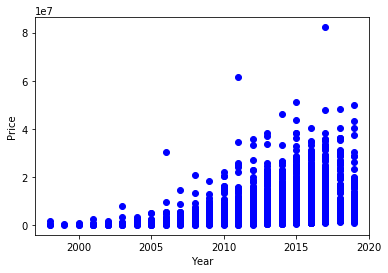

In [8]:
plt.scatter(cdf.Year, cdf.Price,  color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [9]:
msk = np.random.rand(len(Train_df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train Data Distribution

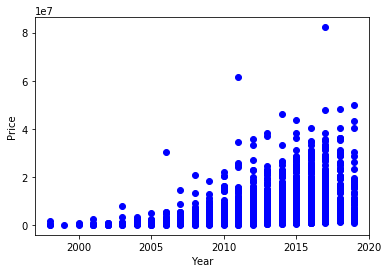

In [10]:
plt.scatter(train.Year, train.Price,  color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [11]:
train.head()

,Kilometers_Driven,Year,FuelType,TransmissionType,Price,Seats
0,72000,2010,0,0,899500,5
2,46000,2011,2,0,2313000,5
3,87000,2012,1,0,3084000,7
4,40670,2013,1,1,9118360,5
7,36000,2016,1,1,8995000,8


We'll import linear regression model from sklearn 

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Kilometers_Driven','Year','FuelType','TransmissionType', 'Seats']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 1.67903340e+00  4.12601969e+05 -2.03223188e+06  7.08078361e+06
   2.70883690e+05]]
Intercept:  [-8.26437557e+08]


### Prediction

We'll use ordinary least squares and get the Residual sum of squares and variance score

In [13]:
y_pred= regr.predict(test[['Kilometers_Driven','Year','FuelType','TransmissionType','Seats']])
x = np.asanyarray(test[['Kilometers_Driven','Year','FuelType','TransmissionType','Seats']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 15546706064305.86
Variance score: 0.46


In [21]:
y_pred = np.asanyarray(y_pred)

In [22]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

[-8.26437557e+08]
[[ 1.67903340e+00  4.12601969e+05 -2.03223188e+06  7.08078361e+06
   2.70883690e+05]]


In [16]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


#### Saving the Model

In [23]:
# Save your model
import joblib
joblib.dump(regr, 'model.pkl')
print("Model dumped!")

# Load the model that you just saved
regr = joblib.load('model.pkl')

Model dumped!


In [24]:
model_columns = list((test[['Kilometers_Driven','Year','FuelType','TransmissionType','Seats']]).columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Model columns dumped")

Model columns dumped


#### Comparing the Actual price and Predicted Price

In [25]:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,6425000,4.346438e+06
1,1207900,-8.987445e+05
2,1799000,3.598468e+06
3,4240500,4.370603e+06
4,1413500,1.510830e+06


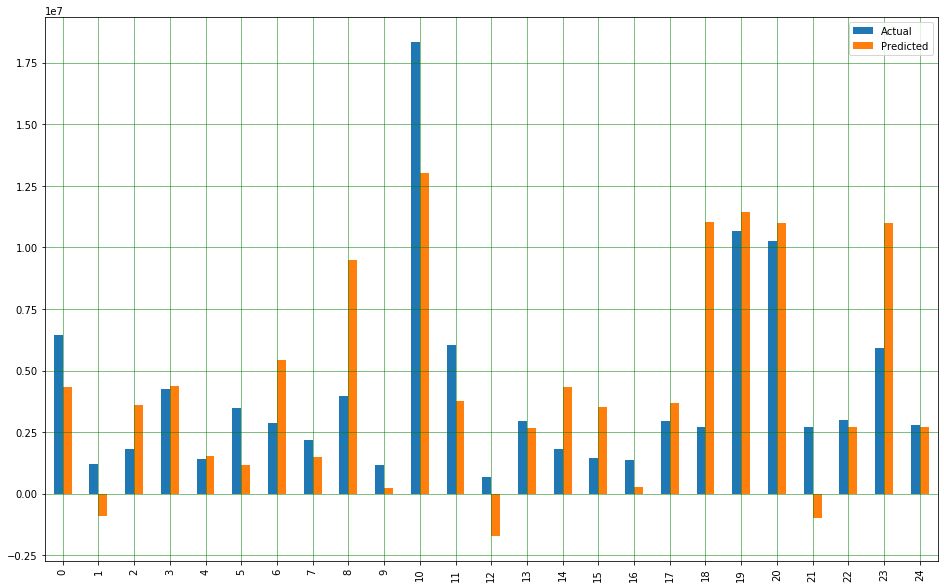

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### End of Notebook

Thank You,

Oluwatooni Adebiyi